In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Stock_data.csv'
df=pd.read_csv(path)
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


Enter the start date (DD.MM.YYYY): 12.12.2012
Enter the end date (DD.MM.YYYY): 11.12.2013


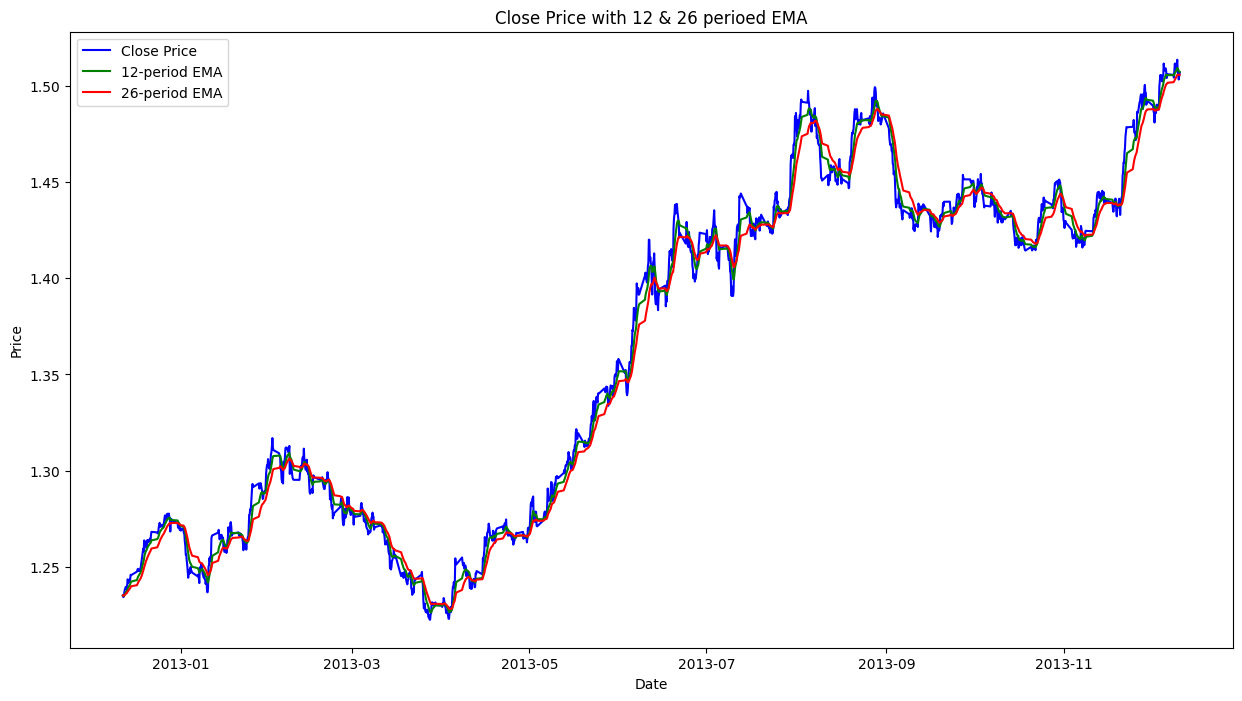

In [2]:
# 1) Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages.
# Calculate them and plot These two with Close price in a line chart

start_date = input("Enter the start date (DD.MM.YYYY): ")
end_date = input("Enter the end date (DD.MM.YYYY): ")

df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date = pd.to_datetime(start_date, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date, format='%d.%m.%Y')

data = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

data.loc[:, 'EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data.loc[:, 'EMA26']= data['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(15, 8))
plt.plot(data['Gmt time'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Gmt time'], data['EMA12'], label='12-period EMA', color='green')
plt.plot(data['Gmt time'], data['EMA26'], label='26-period EMA', color='red')

plt.title('Close Price with 12 & 26 perioed EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

Enter the start date (DD.MM.YYYY): 12.12.2012
Enter the end date (DD.MM.YYYY): 11.12.2013


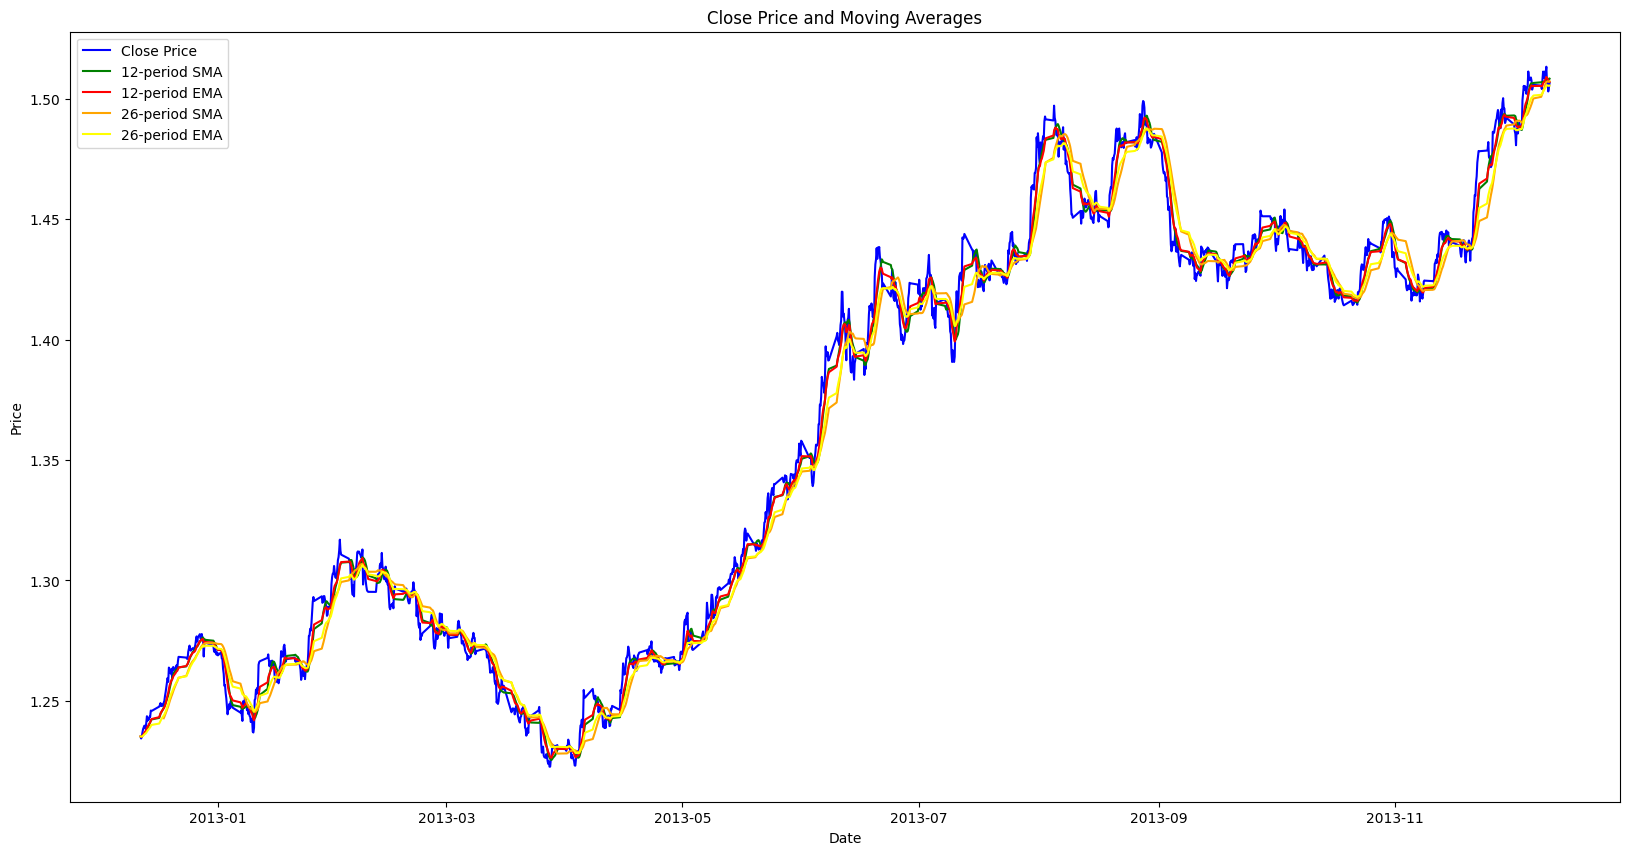

In [3]:
# 2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart
# a)  compare SMA 12 EMA 12 and CLOSE
# b) compare SMA 26 EMA 26 and CLOSE


start_date = input("Enter the start date (DD.MM.YYYY): ")
end_date = input("Enter the end date (DD.MM.YYYY): ")

df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date = pd.to_datetime(start_date, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date, format='%d.%m.%Y')

data = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

data.loc[:, 'SMA12'] = data['Close'].rolling(window=12).mean()
data.loc[:, 'SMA26'] = data['Close'].rolling(window=26).mean()

data.loc[:, 'EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data.loc[:, 'EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(20, 10))
plt.plot(data['Gmt time'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Gmt time'], data['SMA12'], label='12-period SMA', color='green')
plt.plot(data['Gmt time'], data['EMA12'], label='12-period EMA', color='red')
plt.plot(data['Gmt time'], data['SMA26'], label='26-period SMA', color='orange')
plt.plot(data['Gmt time'], data['EMA26'], label='26-period EMA', color='yellow')

plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()



Enter the start date (DD.MM.YYYY): 12.12.2012
Enter the end date (DD.MM.YYYY): 11.12.2013


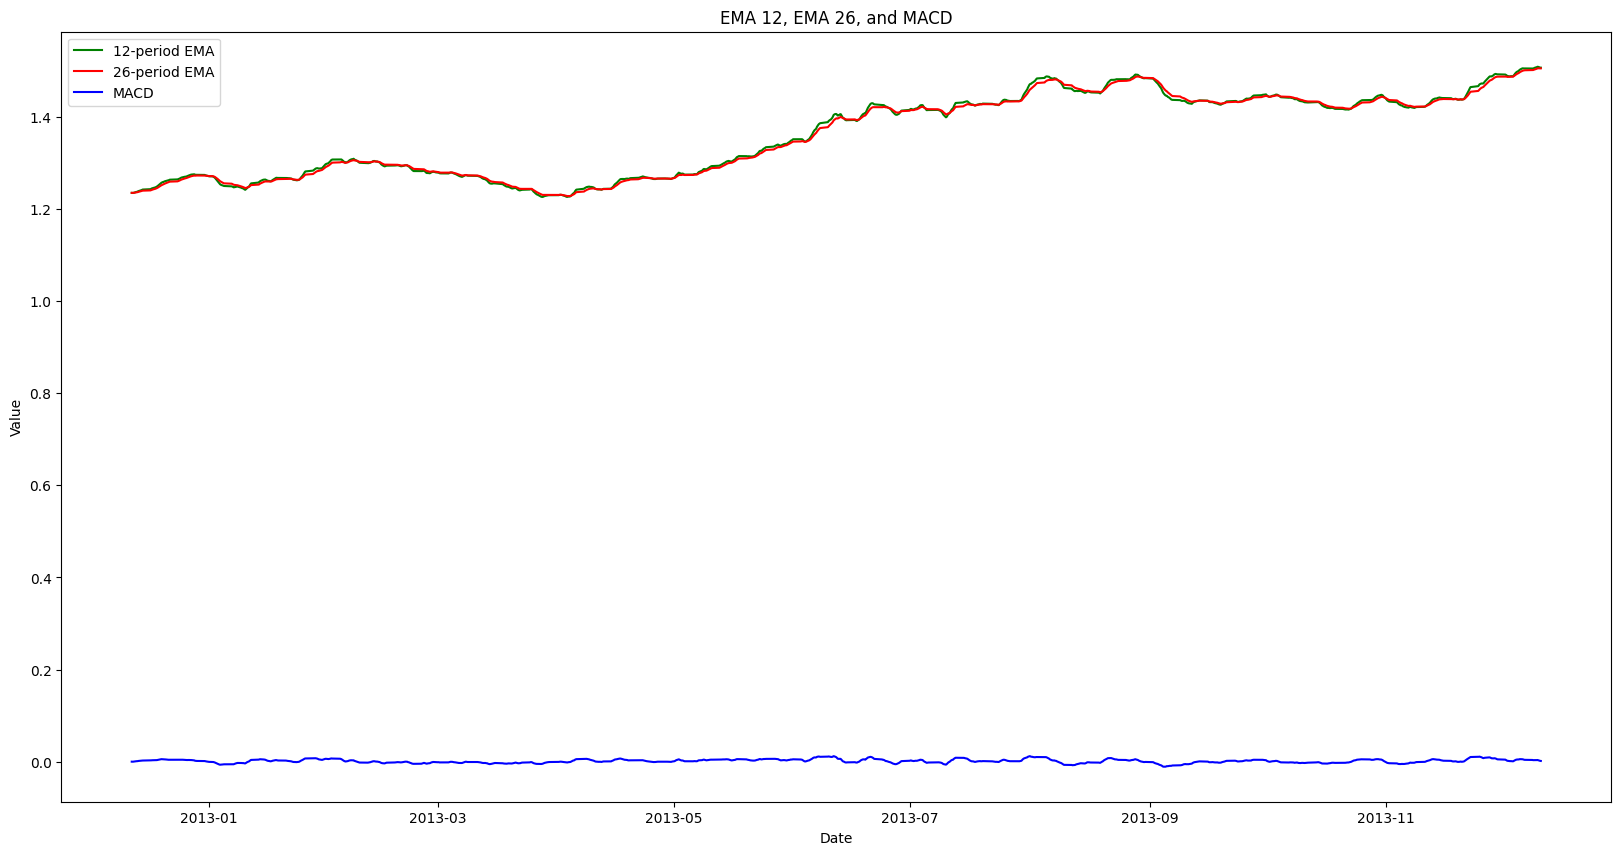

In [7]:
# 3) calculate MACD between EMA 26 and EMA 12
# Plot line chart showing EMA 26 and EMA 12 and MACD

start_date = input("Enter the start date (DD.MM.YYYY): ")
end_date = input("Enter the end date (DD.MM.YYYY): ")

df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date = pd.to_datetime(start_date, format='%d.%m.%Y')
end_date = pd.to_datetime(end_date, format='%d.%m.%Y')

data = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)].copy()

data.loc[:, 'EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data.loc[:, 'EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()

data.loc[:, 'MACD'] = data['EMA12'] - data['EMA26']

plt.figure(figsize=(20, 10))
plt.plot(data['Gmt time'], data['EMA12'], label='12-period EMA', color='green')
plt.plot(data['Gmt time'], data['EMA26'], label='26-period EMA', color='red')
plt.plot(data['Gmt time'], data['MACD'], label='MACD', color='blue')

plt.title('EMA 12, EMA 26, and MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.show()


In [5]:
# Calculate RSI, Bollinger bands and ADX using the notebook for our own data


# ADX
!pip install pandas_ta
import pandas_ta as ta

n = 14  # Period for ADX calculation

# Calculate ADX using pandas_ta
df['ADX'] = ta.adx(df['High'], df['Low'], df['Close'], length=n)

# Plot the ADX and Close Price
plt.figure(figsize=(15, 8))
plt.plot(df['Gmt time'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Gmt time'], df['ADX'], label='ADX', color='red')

plt.title('Average Directional Index (ADX) and Close Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.show()




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=674390239b349dadb47e59310d42ca742810b8fa563678f8a4b0bd093886f94b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


ValueError: ignored

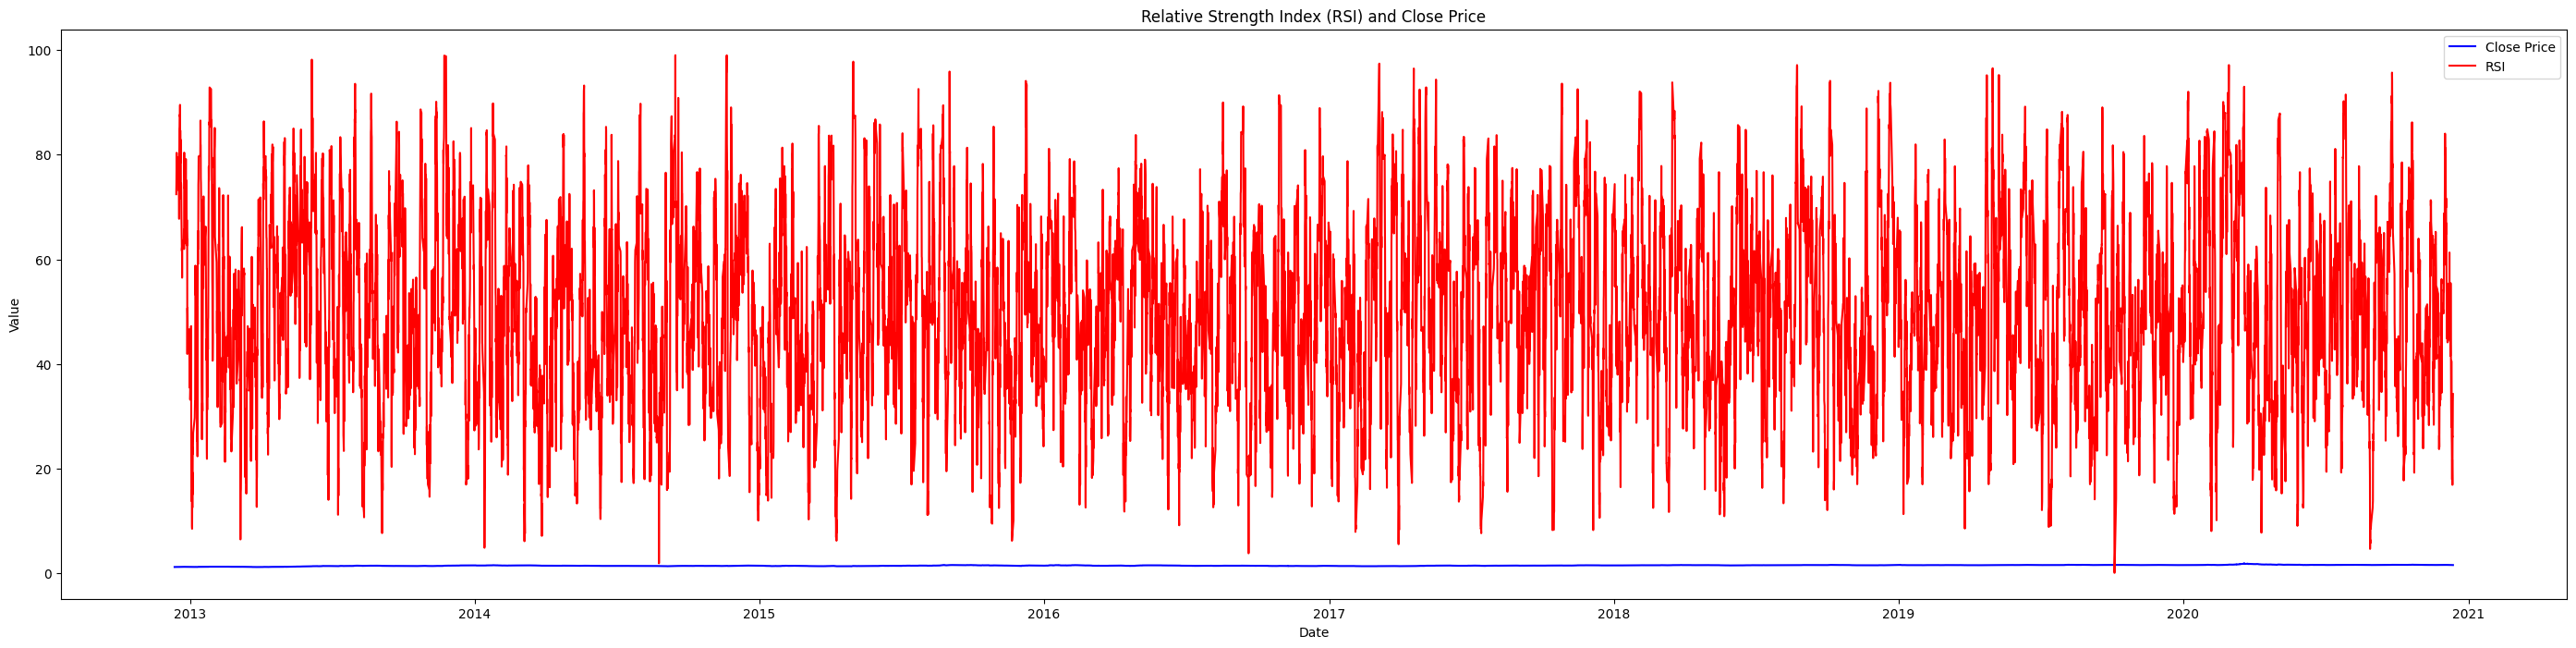

In [8]:
# RSI

n = 14  # Period for RSI calculation

df['PriceChange'] = df['Close'].diff()

df['PositiveChange'] = df['PriceChange'].where(df['PriceChange'] > 0, 0)
df['NegativeChange'] = df['PriceChange'].where(df['PriceChange'] < 0, 0).abs()

df['AvgGain'] = df['PositiveChange'].rolling(window=n).mean()
df['AvgLoss'] = df['NegativeChange'].rolling(window=n).mean()

df['RS'] = df['AvgGain'] / df['AvgLoss']

df['RSI'] = 100 - (100 / (1 + df['RS']))

plt.figure(figsize=(35, 8))
plt.plot(df['Gmt time'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Gmt time'], df['RSI'], label='RSI', color='red')

plt.title('Relative Strength Index (RSI) and Close Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.show()


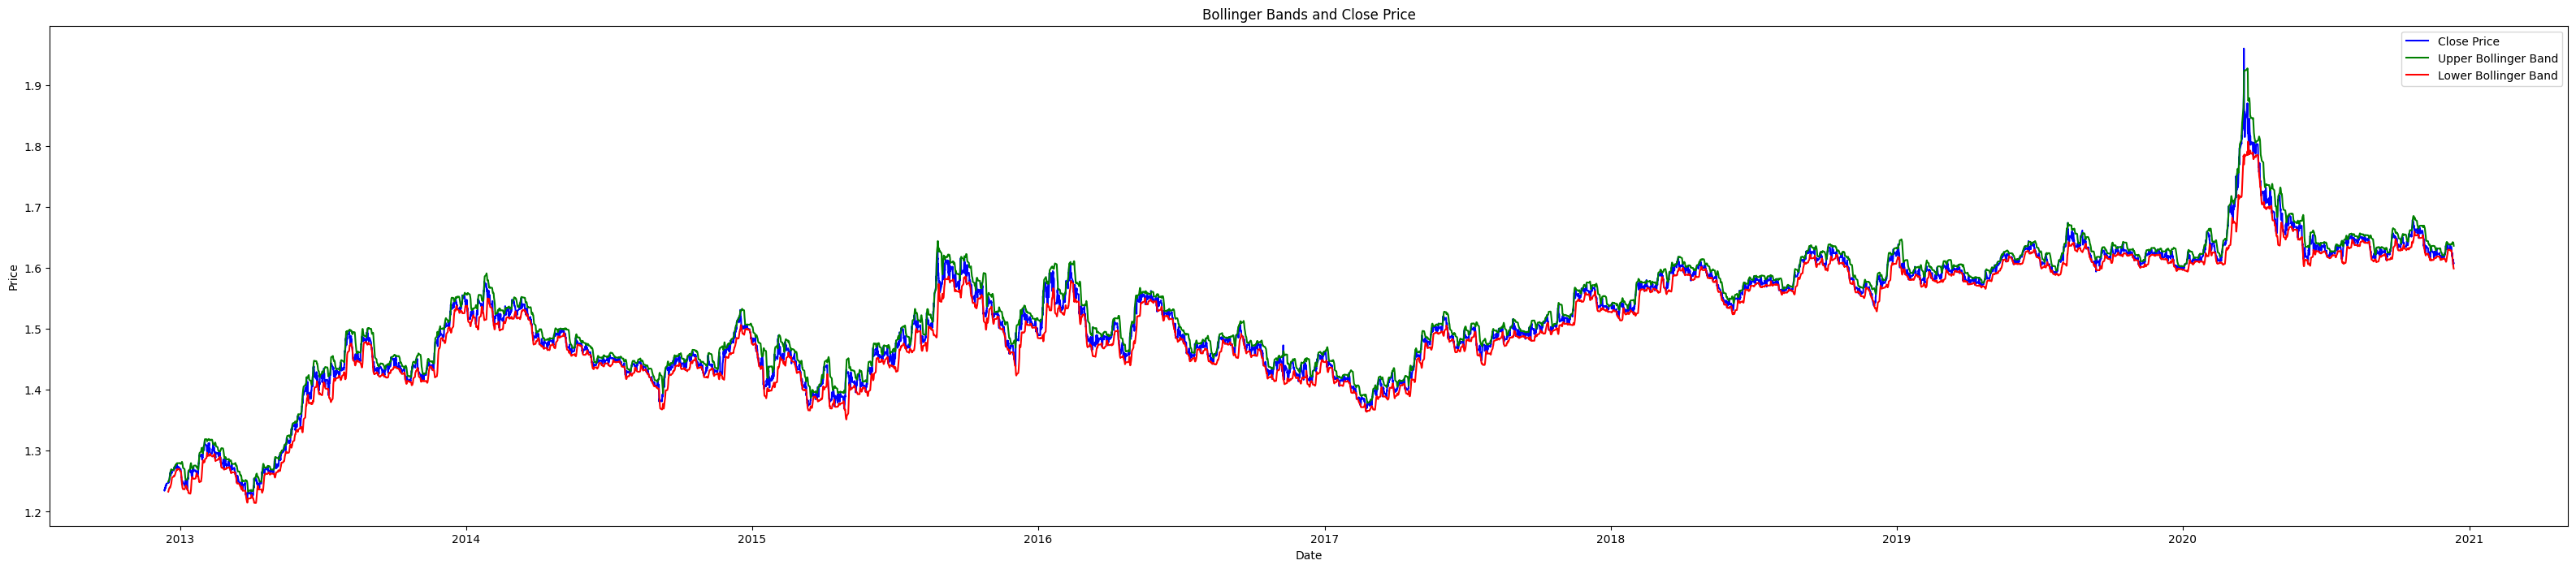

In [9]:
# Bollinger bands

import pandas as pd
import matplotlib.pyplot as plt

n = 20  # Period for Bollinger Bands calculation
k = 2  # Number of standard deviations for the bands

df['SMA'] = df['Close'].rolling(window=n).mean()

df['STD'] = df['Close'].rolling(window=n).std()

df['Upper_Band'] = df['SMA'] + (k * df['STD'])
df['Lower_Band'] = df['SMA'] - (k * df['STD'])

plt.figure(figsize=(40, 8))
plt.plot(df['Gmt time'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Gmt time'], df['Upper_Band'], label='Upper Bollinger Band', color='green')
plt.plot(df['Gmt time'], df['Lower_Band'], label='Lower Bollinger Band', color='red')

plt.title('Bollinger Bands and Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


NameError: ignored

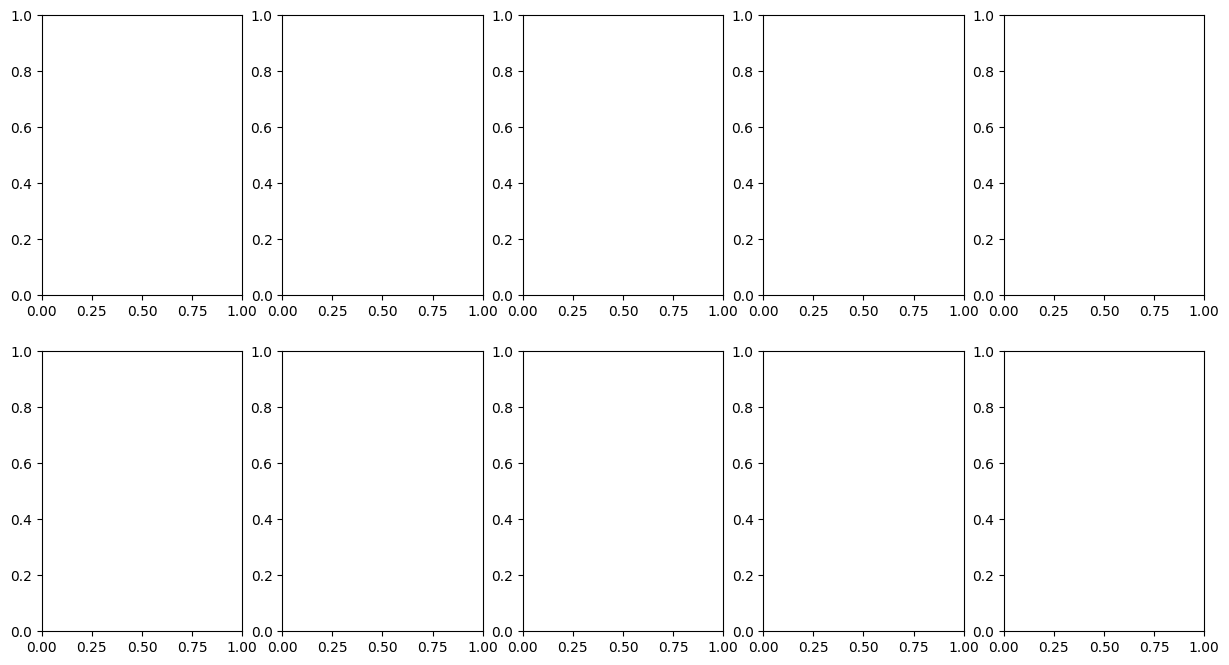

In [15]:
# Last step do a subplot with all indicators
# So your plot will have 10 subplots
# 1) SMA 12 vs close
# 2) SMA 26 vs close
# 3) EMA 12 vs close
# 4) EMA 26 vs close
# 5) MACD
# 6) RSI 12 vs close
# 7) RSI 26 vs close
# 8) Bollinger bands all three vs close
# 9) ADX
# 10) Close vs High vs Low


# 2x5 subplot grid for 10 subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 8))

# Plot 1: SMA 12 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(SMA12, label='SMA 12')
axs[0, 0].set_title('SMA 12 vs Close')
axs[0, 0].legend()

# Plot 2: SMA 26 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(SMA26, label='SMA 26')
axs[0, 0].set_title('SMA 26 vs Close')
axs[0, 0].legend()

# Plot 3: EMA 12 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(EMA12, label='EMA 12')
axs[0, 0].set_title('EMA 12 vs Close')
axs[0, 0].legend()

# Plot 4: EMA 26 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(EMA26, label='EMA 26')
axs[0, 0].set_title('EMA 26 vs Close')
axs[0, 0].legend()

# Plot 5: MACD
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(MACD, label='MACD')
axs[0, 0].set_title('MACD vs Close')
axs[0, 0].legend()

# Plot 6: RSI 12 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(RSI12, label='RSI 12')
axs[0, 0].set_title('RSI 12 vs Close')
axs[0, 0].legend()

# Plot 7: RSI 26 vs close
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(RSI26, label='RSI 26')
axs[0, 0].set_title('RSI 26 vs Close')
axs[0, 0].legend()

# Plot 8: Bollinger Bands vs close
axs[0, 4].plot(Close, label='Close')
axs[0, 4].plot(bollinger_upper, label='Upper Bollinger Band')
axs[0, 4].plot(bollinger_lower, label='Lower Bollinger Band')
axs[0, 4].set_title('Bollinger Bands vs Close')
axs[0, 4].legend()

# Plot 9: ADX
axs[0, 0].plot(Close, label='Close')
axs[0, 0].plot(ADX, label='ADX')
axs[0, 0].set_title('ADX vs Close')
axs[0, 0].legend()

# Plot 10: Close vs High vs Low
axs[1, 0].plot(Close, label='Close')
axs[1, 0].plot(High, label='High')
axs[1, 0].plot(Low, label='Low')
axs[1, 0].set_title('Close vs High vs Low')
axs[1, 0].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
